# BOOMBIKES Case Study
***
## A Linear Prediction Model

                                                                                                - Dated: 27 May 2021
                                                                                                - By: Abhishek Singh
                                                                                                - aulakh.abhishek@gmail.com

***

## Boombikes 
Boombikes (here in after Company) is a bike-sharing firm which provided service in which bikes are made available for shared use to individuals on a short term basis for a price or free. The bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

<br>

### Requirement 
Company wants to understand the factors affecting the demand for these shared bikes in the American market. Specifically 
> - Which factors are significant in predicting the demand for shared bikes.
> - How well those variables describe the bike demands

<br>Based on various meteorological surveys and people's styles, the service provider firm has provided a large dataset on daily bike demands across the American market based on some factors.

### Business Goal
Build a Linear Model to understand the features affecting the demand for shared bikes. Company will use model to understand how exactly the demands vary with different factors. Company can then accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.
***

### Importing the Libraries

In [1]:
# Usual imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Suppress the Warnings
import warnings
warnings.filterwarnings('ignore')
# Inline plots
%matplotlib inline
# Dark grid in the plots
sns.set_style("darkgrid")

### Importing and Understanding the Dataset

In [2]:
df = pd.read_csv('day.csv',encoding='ISO-8859-1')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
print('Shape of the dataset = ', df.shape,'\n')
print(df.info())

Shape of the dataset =  (730, 16) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Interpretation

-  730 data points(records) with no missing values in any column
- 7 categorical variables 
- 8 numerical variables
- 1 Datetime field 
- 1 index (Sequencing) field

In [5]:
#Let's label few columsn properly for EDA and better representation and interpretation
df.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count', 'weathersit':'weather'}, inplace = True) 
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
#Renaming the season, month, weather, weekday for EDA and Visualization
df['season']=df.season.map({1: 'Spring', 2: 'Summer',3:'Fall', 4:'Winter' })
df['month']=df.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weather']=df.weather.map({1: 'Clear',2:'Mist_n_Cloudy',3:'Light_Snow',4:'Snow_n_Fog'})
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [7]:
df.head(2)

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,Spring,0,Jan,0,Sat,0,Mist_n_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Sun,0,Mist_n_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801


***
# EDA
***
#### Visualizing the Numerical variables 

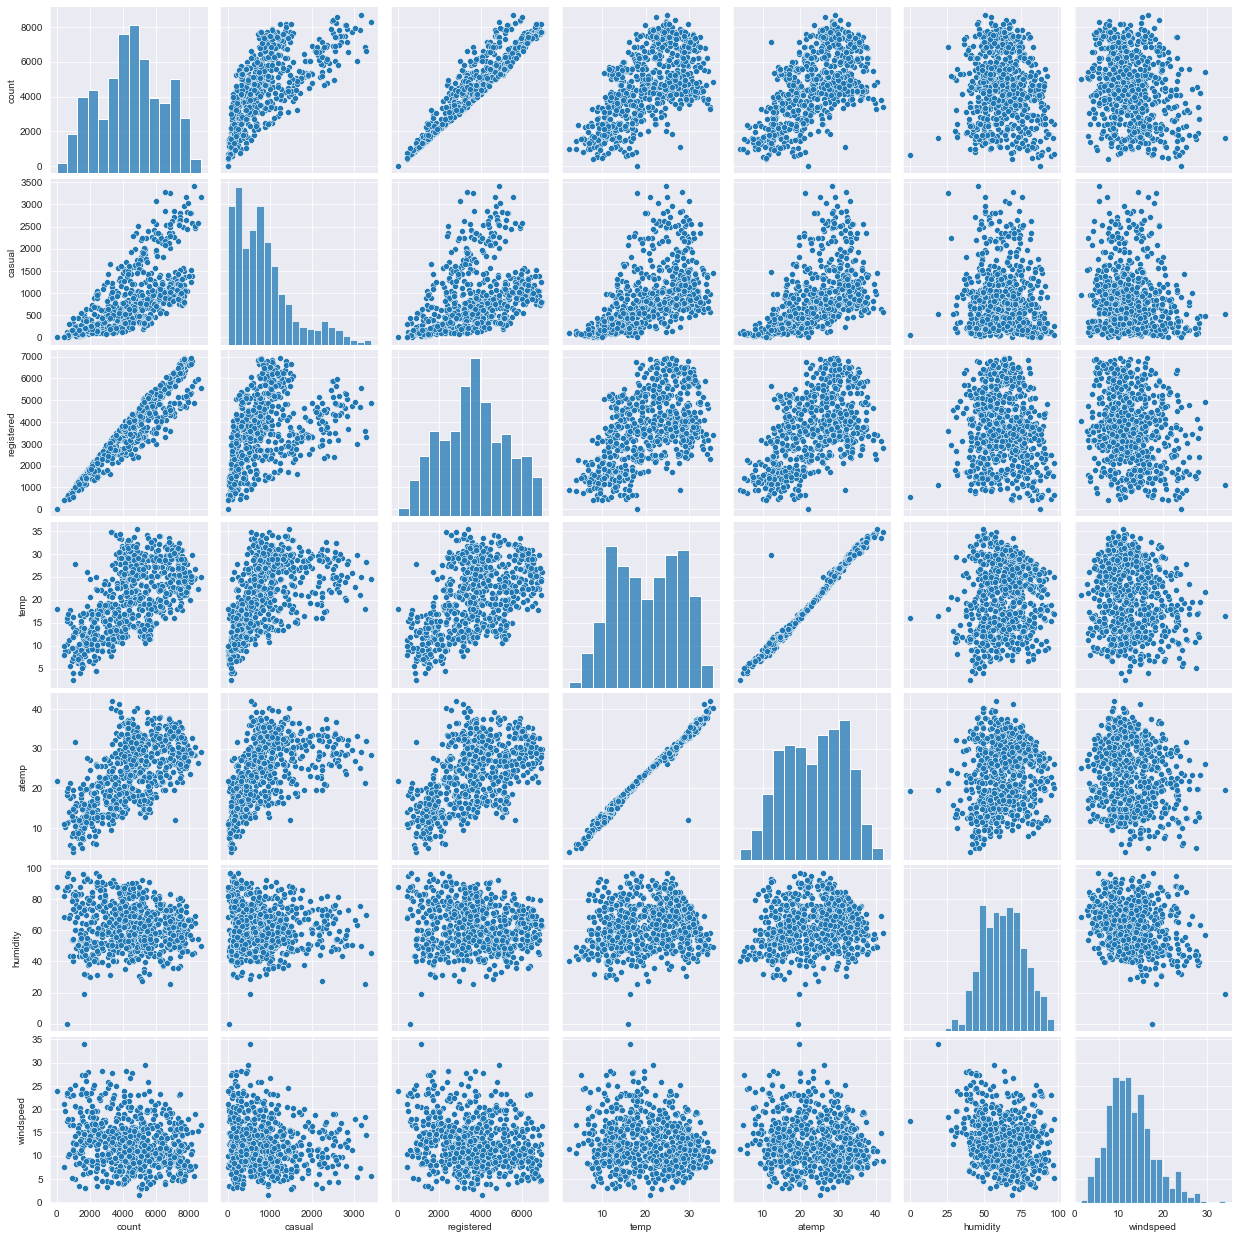

In [8]:
num_vars = ['count','casual','registered','temp','atemp','humidity','windspeed']
# Drawing pair plots to see the relation amongst each other and the target variable
sns.pairplot(df[num_vars])
plt.show()

- **Our Predictor variable is `count` which represents to count of total rental bikes including both casual and registered on any given day. i.e Sum of Casual & Registered**

- **Also very distinguishably, there is a strong multi-collinearity between 'temp' and 'atemp'**

***
### Visualizing the Categorical Variables

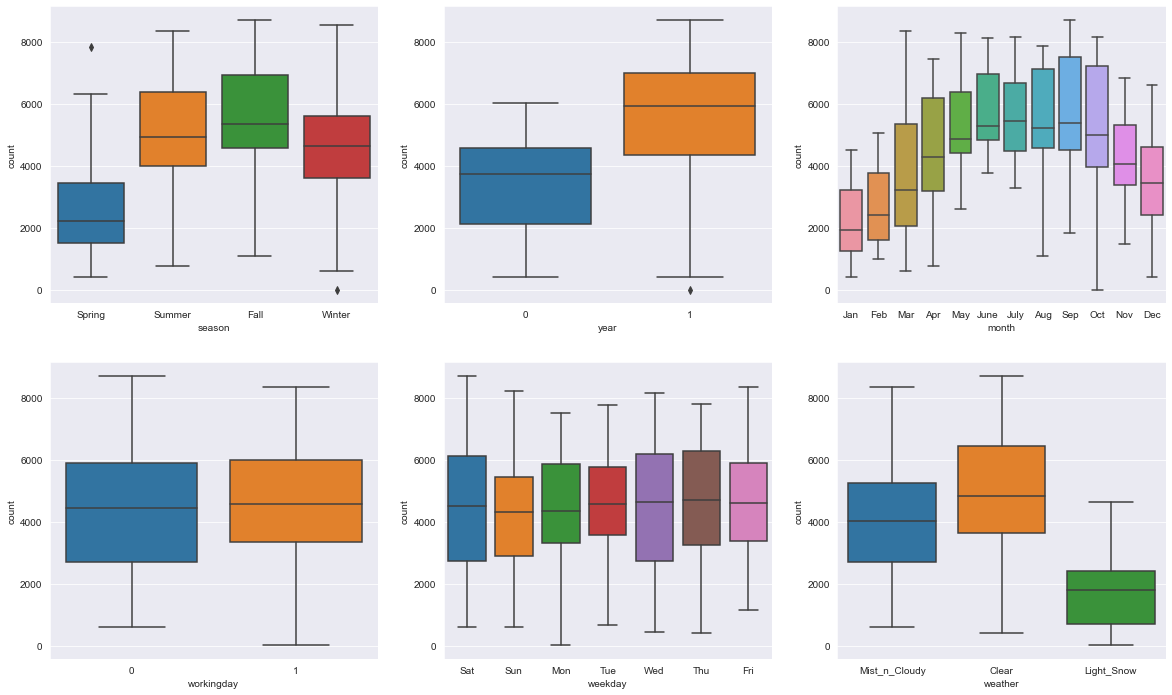

In [9]:
#cate_vars = ['season','year','month','holiday','weekday','weathersit','workingday']
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'count', data = df) 
plt.subplot(2,3,2)
sns.boxplot(x = 'year', y = 'count', data = df)     # 0:2018, 1:2019
plt.subplot(2,3,3)
sns.boxplot(x = 'month', y = 'count', data = df)   
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'count', data = df) # 0:Yes, 1:No
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'count', data = df) # 1:Yes, 0:No
plt.subplot(2,3,6)
sns.boxplot(x = 'weather', y = 'count', data = df)
plt.show()

#### Inference 
- The demand of Bikes changes significantly across the season, The demand is high in Summer and Fall season
- Bike demand for Bikes have risen in 2019 when compated with 2018 
- Bike demand remains high between May (Summer) and October (Fall) month of the year and then comes down
- Bike demand is slightly less on a Holiday
- There is no clear change in demand based on weekday i.e whether it is Monday or Tuesday etc.
- The demand for Bikes is relatavily high when the weather is clear compared to situations when it is Misty or Raining outside

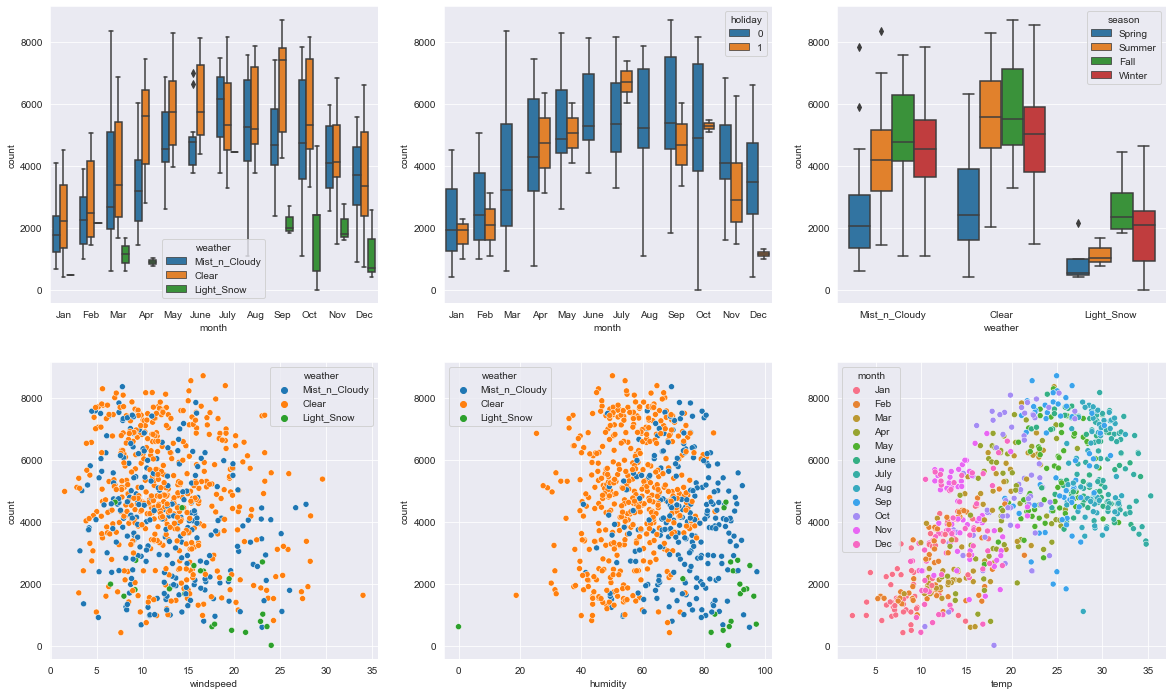

In [10]:
#cate_vars = ['season','year','month','holiday','weekday','weathersit','workingday']
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'month', y = 'count', hue = 'weather', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'month', y = 'count', hue = 'holiday', data = df) 
plt.subplot(2,3,3)
sns.boxplot(x = 'weather', y = 'count', hue = 'season', data = df)  
plt.subplot(2,3,4)
sns.scatterplot(x='windspeed', y='count', hue='weather',data=df) 
plt.subplot(2,3,5)
sns.scatterplot(x='humidity', y='count',hue='weather',data=df)
plt.subplot(2,3,6)
sns.scatterplot(x='temp',y='count',hue='month' ,data=df)
plt.show()

### Observations 
> 1. Plot 1 : Peak demand happens between May and October and is relatively high when it Clear outside
> 2. Plot 2 : Peak demand happens between May and October and is relatively high when it is not a holiday
> 3. Plot 3 : Peak demand happens when weather is Clear and between Summer & Fall season
> 4. Plot 4 : Peak demand happens when Windspeed is less than 15 and is relatively high when it Clear outside
> 5. Plot 5 : Peak demand happens when Humidity is around 50-70% and is relatively high when it Clear outside
> 6. Plot 6 : Peak demand happens when temprature is above 20 degrees and between May and October month of the year

***
# Data Preparation
***

## 1. Data Clean up
- Removing Redundant and non-signifant variables

In [11]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,Spring,0,Jan,0,Sat,0,Mist_n_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Sun,0,Mist_n_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- **We can drop the `instant` column as it is just an index of the records and will cause problems in the Linear model later**
- **Also, Since we are not modeling a timeseries data, We can drop the `dteday` column. As a matter of fact the day,month and year data is already captured in other feilds**

In [12]:
# Lets Calculate correlation table for the dataframe
cor = df.corr()
cor

,instant,year,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
instant,1.000000,0.866026,0.016275,-0.004619,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
year,0.866026,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
holiday,0.016275,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
workingday,-0.004619,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
temp,0.150738,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
humidity,0.016080,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.112667,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.275604,0.250502,0.054055,-0.517607,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.660544,0.596911,-0.109142,0.305437,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411


- **temp and atemp are highly correlated, One of them can be removed** 
- **Working Day contains information presented by Holiday fields, We can remove Holiday** 
- **Count(target variable) is the sum of 'casual' & 'registered', So that information is already captured, we can safely remove 'casual and 'registered'**

In [13]:
cols_to_drop = ['instant','dteday','atemp','holiday','registered','casual']
df_drop = df.drop(cols_to_drop,axis=1)
print('Shape of df = ', df.shape)
df_drop.head(2)

Shape of df =  (730, 16)


,season,year,month,weekday,workingday,weather,temp,humidity,windspeed,count
0,Spring,0,Jan,Sat,0,Mist_n_Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,Sun,0,Mist_n_Cloudy,14.902598,69.6087,16.652113,801


***
## 2. Data Encoding

### Dummy Variables for Categorical Features

- Since we have several categorical variables in each of which there is no order( One is not greater than other in value) , We will use OneHotEncoding to create dummy variables
- 'year' and 'workingday' are already in binary form, We don't need to touch them
- **'season','weekday' and 'weather' are categorical features for which we will create a set of dummy variables for them**

In [14]:
cate_vars = ['season','weekday','month','weather']
# Using pandas get_dummies feature for OHE
df_mod = pd.get_dummies(data=df_drop,columns = cate_vars, drop_first=True)

- Modified dataframe with non-binary Categorical features converted into set of Dummy variables uning OneHotEncoding 
- First dummy field is dropped to ensure the model have least number of columns to deal with

In [15]:
df_mod.head(2)

,year,workingday,temp,humidity,windspeed,count,season_Spring,season_Summer,season_Winter,weekday_Mon,...,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weather_Light_Snow,weather_Mist_n_Cloudy
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


***
## 3. Splitting the data into training and test set

In [16]:
from sklearn.model_selection import train_test_split
# Splitting up 30% of the data into test set
np.random.seed(0)
df_train, df_test = train_test_split(df_mod, train_size = 0.7, test_size = 0.3, random_state = 100)

In [17]:
print(df_train.shape)
print(df_test.shape)

(510, 28)
(219, 28)


***
## 4. Feature Scaling 

The varaiables in our dataframe are spread across from 0 to thousands so we will scale the features using MinMax Scaling which are not binary or  dummy variables

In [18]:
from sklearn.preprocessing import MinMaxScaler
# Created a scaler object
scaler = MinMaxScaler()

In [19]:
df_train.head(2)

,year,workingday,temp,humidity,windspeed,count,season_Spring,season_Summer,season_Winter,weekday_Mon,...,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weather_Light_Snow,weather_Mist_n_Cloudy
653,1,1,19.201653,55.8333,12.208807,7534,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
576,1,1,29.246653,70.4167,11.083475,7216,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [20]:
#Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['count','temp','windspeed','humidity']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [21]:
print(df_train.shape)
df_train.describe()

(510, 28)


,year,workingday,temp,humidity,windspeed,count,season_Spring,season_Summer,season_Winter,weekday_Mon,...,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weather_Light_Snow,weather_Mist_n_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.150980,...,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.029412,0.343137
std,0.500429,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.358381,...,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


***
## 5. Feature Selection
***
- Selecting the important features from the given set of columns

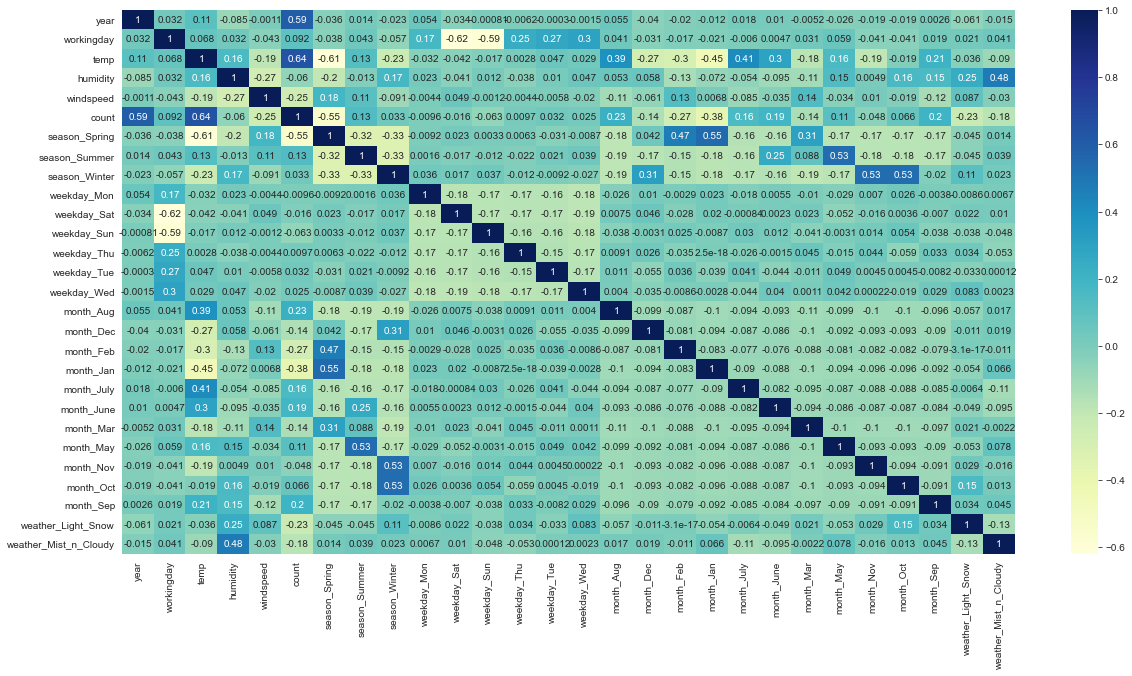

In [22]:
# Lets see the Correlation between each of the variables to understand multi-collinearity
plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- We can see cnt have strong relationship with few of the variables 
- Also there is relatively strong correlation amongst the variables as well, We will tackle this in Feature Selection part using **RFE and Backward elimination**

### Recursive Feature Elememination

- Lets build the model with all the variables and remove the insignifant variables using p-Value and VIF method

In [23]:
# Importing RFE and LinearRegression from sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
# Importing statsmodel.api for Summary statsitics
import statsmodels.api as sm

#### Splitting the Training Set into matrix of predictor variables and target variable ('cnt')

In [24]:
y_train = df_train.pop('count')
X_train = df_train

- Using RFE to select top 10 features from the Model using automatated method

In [25]:
## # Lets refine the model to select top 10 significant predictor variables using RFE 
lm = LinearRegression() # Instantiating the object of LinearRegression Model class
lm.fit(X_train, y_train)  
rfe = RFE(lm, 10)           
rfe = rfe.fit(X_train, y_train)

- Let's see the Support and Ranking of the Variables in X_train

In [26]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
#print(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),end='')

[('year', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 5),
 ('season_Winter', False, 4),
 ('weekday_Mon', False, 12),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 3),
 ('weekday_Thu', False, 15),
 ('weekday_Tue', False, 13),
 ('weekday_Wed', False, 16),
 ('month_Aug', False, 11),
 ('month_Dec', False, 8),
 ('month_Feb', False, 9),
 ('month_Jan', False, 6),
 ('month_July', True, 1),
 ('month_June', False, 17),
 ('month_Mar', False, 18),
 ('month_May', False, 10),
 ('month_Nov', False, 7),
 ('month_Oct', False, 14),
 ('month_Sep', True, 1),
 ('weather_Light_Snow', True, 1),
 ('weather_Mist_n_Cloudy', True, 1)]

-  **Top 10 significant variables with rfe_support_ as True and with Rankings will be selected.**

In [27]:
# List of predictors with rfe_support as True
X_train.columns[rfe.support_]

Index(['year', 'temp', 'humidity', 'windspeed', 'season_Spring', 'weekday_Sat',
       'month_July', 'month_Sep', 'weather_Light_Snow',
       'weather_Mist_n_Cloudy'],
      dtype='object')

- **Let's peek through, the columns dropped by RFE (Recursive Feature Elimination) in the first round**

In [28]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_Summer', 'season_Winter', 'weekday_Mon',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'month_Aug',
       'month_Dec', 'month_Feb', 'month_Jan', 'month_June', 'month_Mar',
       'month_May', 'month_Nov', 'month_Oct'],
      dtype='object')

- **Filter the Dataset to remove the non-significant variables**

In [29]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'temp', 'humidity', 'windspeed', 'season_Spring', 'weekday_Sat',
       'month_July', 'month_Sep', 'weather_Light_Snow',
       'weather_Mist_n_Cloudy'],
      dtype='object')

- **The RFE Training set with 10 significant variables**

In [30]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Model using statsmodel for Summary Statistics

In [31]:
# Adding a constant variable to the updated training set of predictor variables
X_train_sm = sm.add_constant(X_train_rfe)
X_train_sm.head(5)

,const,year,temp,humidity,windspeed,season_Spring,weekday_Sat,month_July,month_Sep,weather_Light_Snow,weather_Mist_n_Cloudy
653,1.0,1,0.509887,0.575354,0.300794,0,0,0,0,0,0
576,1.0,1,0.815169,0.725633,0.264686,0,0,1,0,0,0
426,1.0,1,0.442393,0.640189,0.255342,1,1,0,0,0,1
728,1.0,1,0.245101,0.498067,0.663106,1,0,0,0,0,0
482,1.0,1,0.395666,0.504508,0.188475,0,1,0,0,0,1


- **Fitting the Model and Summary Statistics**

In [32]:
lm_sm = sm.OLS(y_train,X_train_sm).fit()   # Running the linear model using X_train_rfe
lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          4.33e-184
Time:                        10:22:07   Log-Likelihood:                 488.62
No. Observations:                 510   AIC:                            -955.2
Df Residuals:                     499   BIC:                            -908.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3766      0.030     12.421      0.000       0.317       0.436
year                      0.2332      0.008     27.653      0.000       0.217       0.250
temp                      0.4091      0.027     15.413      0.000       0.357       0.461
humidity                 -0.1247      0.038     -3.244      0.001      -0.200      -0.049
windspeed                -0.1802      0.026     -6.805      0.000      -0.232      -0.128
season_Spring            -0.1483      0.012    -11.944      0.000      -0.173      -0.124
weekday_Sat               0.0212      0.012      1.842      0.066      -0.001       0.044
month_July               -0.0794      0.018     -4.464      0.000      -0.114      -0.044
month_Sep                 0.0553      0.016      3.445      0.001       0.024       0.087
weather_Light_Snow       -0.2402      0.027     -8.778      0.000      -0.294      -0.186
weather_Mist_n_Cloudy    -0.0607      0.011     -5.610      0.000      -0.082      -0.039
==============================================================================
Omnibus:                       59.213   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.976
Skew:                          -0.640   Prob(JB):                     5.97e-29
Kurtosis:                       5.116   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **With 10 variables, The p-values are with in limits except weekday_Sat (in the presence of other predictor variables)**
- **R-sq is .829 but probably we have too many variables which can also lead to Overfitting**

Let's trim down a bit more using VIF

***
###  VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $
- Let's check the VIF to remove some insignifacnt variables. 

In [33]:
# Importing the VIF module from statsmodels library  
from statsmodels.stats.outliers_influence import variance_inflation_factor
# dataframe to contain the featuresand their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,humidity,14.91
1,temp,11.88
3,windspeed,3.98
9,weather_Mist_n_Cloudy,2.10
0,year,2.03
4,season_Spring,1.84
6,month_July,1.40
7,month_Sep,1.20
8,weather_Light_Snow,1.20
5,weekday_Sat,1.18


- weekday_Sat can be dropped due to high p-value and low VIF; can be dropped

In [34]:
X_train_rfe = X_train_rfe.drop('weekday_Sat',axis=1)
X_train_rfe.head(2)

,year,temp,humidity,windspeed,season_Spring,month_July,month_Sep,weather_Light_Snow,weather_Mist_n_Cloudy
653,1,0.509887,0.575354,0.300794,0,0,0,0,0
576,1,0.815169,0.725633,0.264686,0,1,0,0,0


-  **Building another model for next iteration**

In [35]:
# Adding a constant variable to the updated training set of predictor variables
X_train_sm = sm.add_constant(X_train_rfe)
lm_sm = sm.OLS(y_train,X_train_sm).fit()  
lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     266.8
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.39e-184
Time:                        10:22:07   Log-Likelihood:                 486.89
No. Observations:                 510   AIC:                            -953.8
Df Residuals:                     500   BIC:                            -911.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3823      0.030     12.642      0.000       0.323       0.442
year                      0.2327      0.008     27.541      0.000       0.216       0.249
temp                      0.4079      0.027     15.336      0.000       0.356       0.460
humidity                 -0.1281      0.039     -3.326      0.001      -0.204      -0.052
windspeed                -0.1789      0.027     -6.742      0.000      -0.231      -0.127
season_Spring            -0.1485      0.012    -11.934      0.000      -0.173      -0.124
month_July               -0.0789      0.018     -4.426      0.000      -0.114      -0.044
month_Sep                 0.0556      0.016      3.454      0.001       0.024       0.087
weather_Light_Snow       -0.2386      0.027     -8.702      0.000      -0.292      -0.185
weather_Mist_n_Cloudy    -0.0600      0.011     -5.534      0.000      -0.081      -0.039
==============================================================================
Omnibus:                       53.449   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.640
Skew:                          -0.557   Prob(JB):                     3.17e-28
Kurtosis:                       5.173   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# dataframe to contain the featuresand their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,humidity,14.88
1,temp,11.88
3,windspeed,3.94
8,weather_Mist_n_Cloudy,2.10
0,year,2.03
4,season_Spring,1.84
5,month_July,1.40
6,month_Sep,1.20
7,weather_Light_Snow,1.20


- We can remove humidity as other variables are able to explaing it and its High VIF value of greater than 10 

In [37]:
X_train_rfe = X_train_rfe.drop('humidity',axis=1)
X_train_sm = sm.add_constant(X_train_rfe)
lm_sm = sm.OLS(y_train,X_train_sm).fit()  
lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     292.9
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.84e-183
Time:                        10:22:07   Log-Likelihood:                 481.31
No. Observations:                 510   AIC:                            -944.6
Df Residuals:                     501   BIC:                            -906.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3038      0.019     15.890      0.000       0.266       0.341
year                      0.2356      0.008     27.744      0.000       0.219       0.252
temp                      0.3937      0.027     14.849      0.000       0.342       0.446
windspeed                -0.1525      0.026     -5.962      0.000      -0.203      -0.102
season_Spring            -0.1460      0.013    -11.638      0.000      -0.171      -0.121
month_July               -0.0727      0.018     -4.058      0.000      -0.108      -0.037
month_Sep                 0.0531      0.016      3.268      0.001       0.021       0.085
weather_Light_Snow       -0.2748      0.025    -10.818      0.000      -0.325      -0.225
weather_Mist_n_Cloudy    -0.0804      0.009     -8.896      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       56.658   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.747
Skew:                          -0.593   Prob(JB):                     1.49e-29
Kurtosis:                       5.200   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# dataframe to contain the featuresand their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.60
2,windspeed,3.81
0,year,2.03
3,season_Spring,1.52
7,weather_Mist_n_Cloudy,1.48
4,month_July,1.33
5,month_Sep,1.20
6,weather_Light_Snow,1.06


### We have our final model after Feature Selection with 8 variables
>- The p-values of all features are less than .05 and hence significant
>- VIF for all features is less than 5 so there not much collinearity present in the dataset now
>- R-Sq is with in acceptable limits of .824 (Value above which can lead to Overfitting) 

- **The Linear Queation for best fitting line is**
>> Count = (0.2356 * year) + (0.3937 * temp) + (-0.1525 * windspeed) + (-0.1460 * season_Spring) + (-0.0727 * month_July) + (0.0531 * month_Sep) + (-0.2748 * weather_Light_Snow) + (-0.0804 * weather_Mist_n_Cloudy) + Error

##  6. Residual Analysis of the training dataset

In [39]:
# Predicting results on Training Dataset using our Linear model
lm = LinearRegression() 
lm.fit(X_train_rfe, y_train) 
y_train_pred = lm.predict(X_train_rfe)

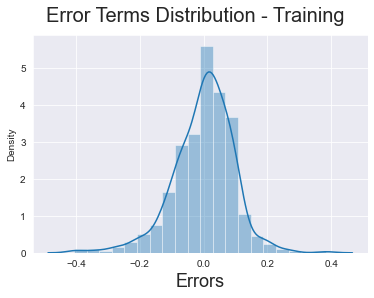

In [40]:
# Plot the distribution of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms Distribution - Training', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)
plt.show()

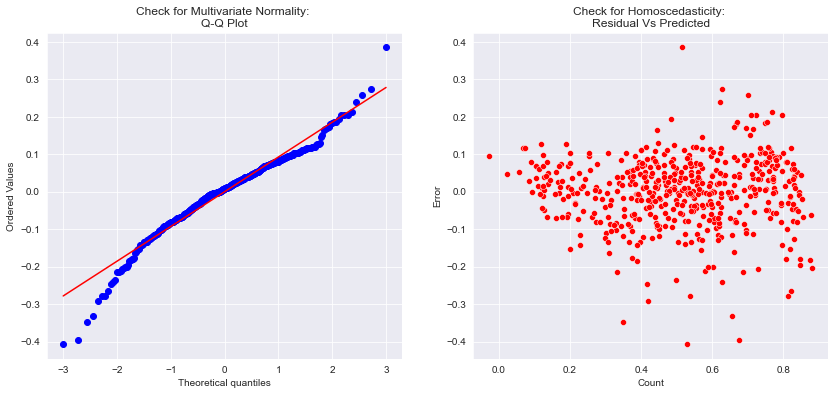

In [41]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_train - y_train_pred),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_train - y_train_pred), x= y_train_pred, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');
plt.ylabel('Error')
plt.xlabel('Count')
plt.show()

- **Perfect, The Error terms are distributed normally so our assumption of Multi-variate normality is validated.**
>- Distribution plot of Error is normal 
>- The Q-Q plot of Error is close to the Straight line y=x 

- **The assumption of Homoscedasticity is validated in the second plot.**

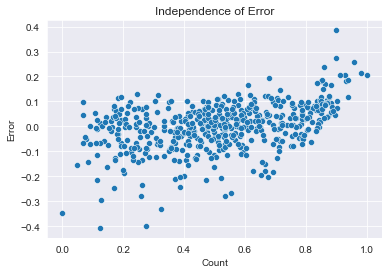

In [42]:
fig = plt.figure()
sns.scatterplot(x=y_train, y=y_train - y_train_pred)
plt.xlabel('Count')
plt.ylabel('Error')
plt.title('Independence of Error')
plt.show()

- **Independence of Error**
> - Error are independent for all values of target variable and centered around mean value of 0, This proves out assumption of Linear Regression

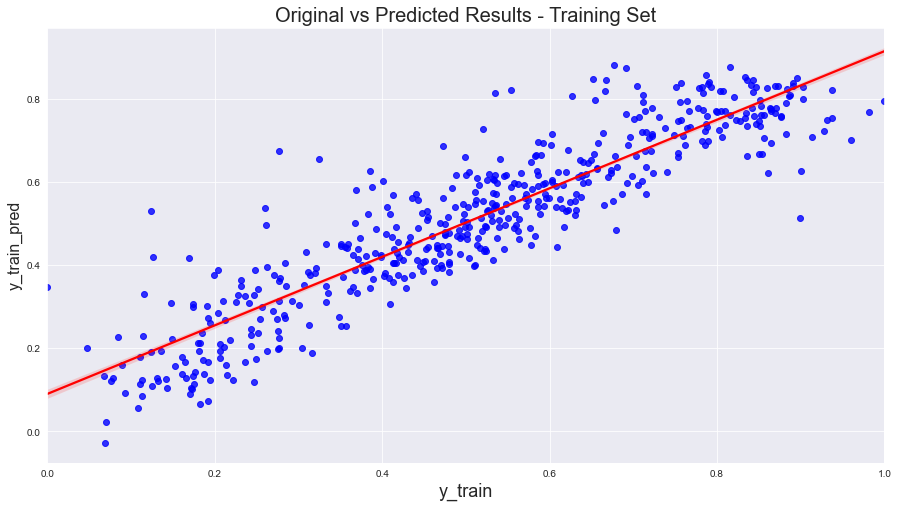

In [43]:
# Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_train, y=y_train_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Original vs Predicted Results - Training Set', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)                          # Y-label
plt.show()

- Super, The Prediction Model (Fitted Line) hugs most of the training data points

***
## 8: Predicting Test Results Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

- **Applying the scaling on the test sets**

In [44]:
# Scaling needs to be done on numerical variables only 
num_vars = ['temp', 'humidity', 'windspeed', 'count']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test

,year,workingday,temp,humidity,windspeed,count,season_Spring,season_Summer,season_Winter,weekday_Mon,...,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weather_Light_Snow,weather_Mist_n_Cloudy
184,0,0,0.000897,1.865042,0.084219,62.272198,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
535,1,1,0.001160,1.725746,0.153728,64.003413,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
299,0,1,-0.000314,2.396893,0.334206,27.400592,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
221,0,1,0.001085,1.215425,0.339570,49.257175,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,1,0.000842,0.853260,0.537414,51.194486,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,-0.001277,2.017000,0.287411,30.368388,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
702,1,1,-0.000287,2.156293,0.283397,68.073828,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
127,0,0,-0.000039,1.846048,0.069510,44.650908,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
640,1,1,0.000570,2.338641,0.052115,78.028312,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


- **Dividing into X_test and y_test**

In [45]:
y_test = df_test.pop('count')
X_test = df_test

In [46]:
# Creating X_test_new dataframe by dropping variables and selecting only the significant features from our final Linear Model
X_test_rfe = X_test[X_train_rfe.columns]

In [47]:
X_test_rfe.head(2)

,year,temp,windspeed,season_Spring,month_July,month_Sep,weather_Light_Snow,weather_Mist_n_Cloudy
184,0,0.000897,0.084219,0,1,0,0,1
535,1,0.001160,0.153728,0,0,0,0,0


In [48]:
# Apply the Model on Test Dataset using Statsmodel api and analyse the Summary Statistics
X_test_sm = sm.add_constant(X_test_rfe)
lm_sm = sm.OLS(y_test,X_test_sm).fit()  
lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     113.0
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           8.66e-72
Time:                        10:22:08   Log-Likelihood:                -778.75
No. Observations:                 219   AIC:                             1576.
Df Residuals:                     210   BIC:                             1606.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    46.2692      1.586     29.175      0.000      43.143      49.396
year                     21.8344      1.184     18.437      0.000      19.500      24.169
temp                   8287.4660   1011.922      8.190      0.000    6292.639    1.03e+04
windspeed                -5.8382      3.839     -1.521      0.130     -13.406       1.729
season_Spring           -16.9207      1.832     -9.236      0.000     -20.532     -13.309
month_July               -4.6472      2.255     -2.061      0.041      -9.092      -0.203
month_Sep                 3.6811      2.174      1.693      0.092      -0.605       7.967
weather_Light_Snow      -21.1866      3.742     -5.661      0.000     -28.564     -13.809
weather_Mist_n_Cloudy    -5.7794      1.278     -4.522      0.000      -8.299      -3.260
==============================================================================
Omnibus:                       20.872   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.586
Skew:                          -0.711   Prob(JB):                     4.58e-06
Kurtosis:                       3.820   Cond. No.                     2.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- **Prediciting the results on Test dataset**

In [49]:
# Making predictions using Sklearn Model
y_test_pred = lm_sm.predict(X_test_sm)

- **Visualising the Test vs Prediction Results**

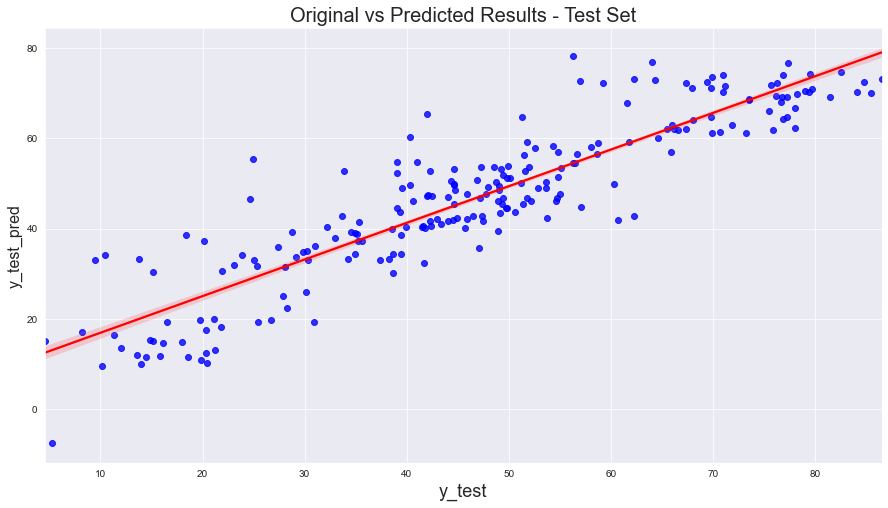

In [50]:
# Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Original vs Predicted Results - Test Set', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

- The Red line shows the Best fitting line for the spread between y_pred vs y_test

***
## 9: Model Evaluation & Results 

> 1. R-Square for the Model on Training Dataset was .824 while R-Square on Test Dataset is .812. This means that our model is behaving signifanntly good on Test dataset as well
> 2. The Prob(F-Stats) is very low which means that we have the evidence to conclude that out Linear regression model fits the data better than the model with no independent variables. **Overall Signifance of our model is Good**
> 3. Multiple Linear Regression Equation 
### <font color='blue'> Count = (0.2356 * year) + (0.3937 * temp) + (-0.1525 * windspeed) + (-0.1460 * season_Spring) + (-0.0727 * month_July) + (0.0531 * month_Sep) + (-0.2748 * weather_Light_Snow) + (-0.0804 * weather_Mist_n_Cloudy) + Error</font>

>4. Intepretation
>> - a. Year have high Coefficient as the Demand in Bikes has signifanctly increased from 2018 to 2019
>> - b. **Rise in temprature basically explains other categorical variables i.e., Clear weather, Summer and Fall Season, and May to October months of the year**
>> - c. Coefficients for Spring Season, July month, Windspeed, Light Snow & Mist_n_Cloudy weather is negative meanting the demand reduces when the strength of these feature inceases independently


In [51]:
# Importing r2score to calulate the R-Square metric on Test Dataset 
from sklearn.metrics import r2_score
round(r2_score(y_true=y_test, y_pred=y_test_pred),3)

0.812

- **The r2_score for test vs prediction from Linear model is .812 which is good enough**

***
## Thank you 
## Abhishek Singh

                                                                                                - Dated: 27 May 2021
                                                                                                - aulakh.abhishek@gmail.com

***